In [1]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 223.7 kB/s eta 0:00:0000:0100:13
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.ensemble import * 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [3]:
X,y = make_classification(n_samples=1000,n_features=4,n_informative=2,n_redundant=0,random_state=0,shuffle=False)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [5]:
clf = CatBoostClassifier(
    iterations=100,          # Number of trees
    depth=6,                 # Maximum tree depth
    learning_rate=0.1,       # Step size shrinkage
    loss_function='Logloss', # Loss function for binary classification
    eval_metric='Accuracy',  # Evaluation metric
    verbose=100              # Print training progress every 100 iterations
)



In [6]:
clf.fit(X_train,y_train)

0:	learn: 0.9492537	total: 56.8ms	remaining: 5.62s
99:	learn: 0.9776119	total: 253ms	remaining: 0us


In [7]:
y_pred = clf.predict(X_test)


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# For binary classification
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9285714285714286
Recall: 0.9512195121951219
F1 Score: 0.9397590361445783


ROC AUC Area: 0.976674992653541


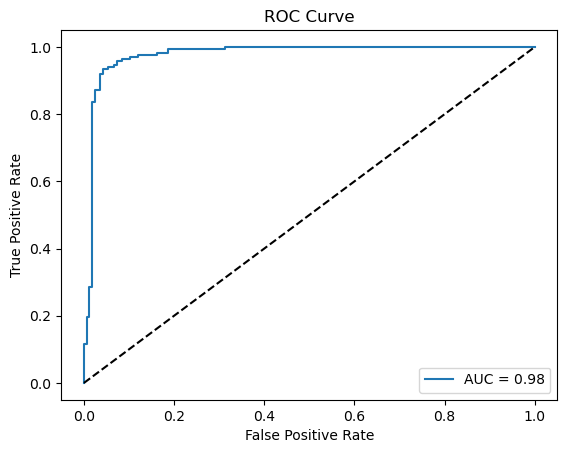

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]  

# AUC Score
auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Area:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')  # diagonal line (random guess)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
